#  Часть 1. Проверка гипотезы в Python и составление аналитической записки

Гипотеза: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы.

Нулевая гипотеза $H_0: \mu_{\text{СПб}} \leq \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге не больше, чем в Москве.

Альтернативная гипотеза $H_1: \mu_{\text{СПб}} > \mu_{\text{Москва}}$ <br> Среднее время активности пользователей в Санкт-Петербурге больше, и это различие статистически значимо.


## Проверка гипотезы о различиях  между пользователями из Москвы и Санкт-Петербурга по активности в сервисе Яндекс книги

- Автор: Завьялов Иван Викторович
- Дата: 17.09.2025

## Цели и задачи проекта

Подготовить данные, сравнить группы между собой и используя статистический тест подтвердить или опровергнуть гипотезу о том,что средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается

## Описание данных

Для анализа предоставлена таблица yandex_knigi_data.csv содержащая данные об активности пользователей из Москвы и Санкт-Петербурга

Поле 'city'-содержит информацию о городе пользователя

Поле 'puid'-содержит информацию об идентификаторе пользователя

Поле 'hours'-содержит информацию об общем количестве часов активности пользователей


## Содержимое проекта

1. Загрузить и провести предобработку данных пользователей из Москвы и Санкт-Петербурга

2. Перед проведением статистического теста сравнить размеры групп и распределение значений

3. Сформулировать гипотезу о различии в активности пользователей из двух городов

4. Провести статистический тест  и сделать выводы
---

## 1. Загрузка данных и знакомство с ними

Загрузите данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`.

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from statsmodels.stats.power import TTestIndPower
import numpy as np

In [2]:
# Загружаем данные и сохраняем их в датафрейм total_df
total_df=pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv', index_col=0)

In [3]:
# Выводим первые 5 строк датафорейма
display(total_df.head())

,city,puid,hours
0,Москва,9668,26.167776
1,Москва,16598,82.111217
2,Москва,80401,4.656906
3,Москва,140205,1.840556
4,Москва,248755,151.326434


In [4]:
# Выводим общую информацию о датафрейме
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8784 non-null   object 
 1   puid    8784 non-null   int64  
 2   hours   8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 274.5+ KB


##### Всего в таблице 8784 строки. Пропусков в данных нет

## 2. Предобработка данных

In [5]:
# Проверим наличие полных дубликатов
display(total_df.duplicated().sum())

0

##### Полных дубликатов в данных нет

In [6]:
# Проверим наличие дубликатов по полю puid с идентификаторами пользователей
display(total_df.duplicated(subset='puid').sum())

244

##### Найдено 244 дубликата. Удалим их 

In [7]:
# Удаляем дубликаты по полю puid
total_df=total_df.drop_duplicates(subset='puid')

In [8]:
# Проверим наличие дубликатов по полю puid с идентификаторами пользователей
display(total_df.duplicated(subset='puid').sum())

0

## 3. Сравнение размеров групп, их статистик и распределения значений в группах перед тестом

In [9]:
# Посчитаем число пользователей в каждом городе
city_groups_size=total_df.groupby('city')['puid'].nunique().reset_index()
display(city_groups_size)

,city,puid
0,Москва,6234
1,Санкт-Петербург,2306


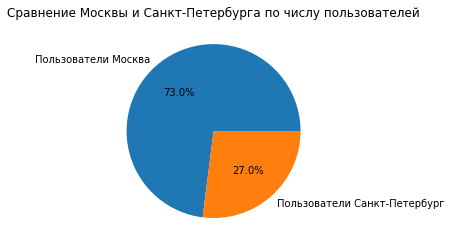

In [10]:
# Построим визуализацию для сранения групп между собой
group_list=city_groups_size['puid'].tolist()
group_m=group_list[0]
group_s=group_list[1]
groups=[group_m,group_s]
plt.pie(groups,
        labels=['Пользователи Москва','Пользователи Санкт-Петербург'],
        autopct='%1.1f%%')
plt.title('Сравнение Москвы и Санкт-Петербурга по числу пользователей')
plt.show()


##### Группы сильно отличаются между собой по размеру. Группа пользователей Москвы почти в три раза больше группы пользователей из Санкт-Петербурга

In [11]:
# Посчитаем средние значения активности по двум группам
mean_hours_groups=total_df.groupby('city')['hours'].mean().sort_values(ascending=False).reset_index()
display(mean_hours_groups)

,city,hours
0,Санкт-Петербург,11.264433
1,Москва,10.881092


In [12]:
# Найдём разницу между статистиками в процентах
list_1=mean_hours_groups['hours'].tolist()
group_1=list_1[0]
group_2=list_1[1]
dif=100*((group_1-group_2)/group_2)
print(f" Процентная разница между Санкт-Петербургом и Москвой по среднему значению активности составляет:{dif:.2f}% ")

 Процентная разница между Санкт-Петербургом и Москвой по среднему значению активности составляет:3.52% 


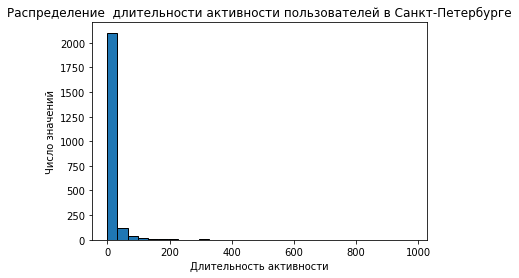

In [13]:
# Построим гистограмму распределения значений для двух городов
spb_df=total_df[total_df['city']=='Санкт-Петербург']
msc_df=total_df[total_df['city']=='Москва']

plt.hist(spb_df['hours'],bins=30,edgecolor='black')
plt.title('Распределение  длительности активности пользователей в Санкт-Петербурге')
plt.xlabel('Длительность активности')
plt.ylabel('Число значений')
plt.show()

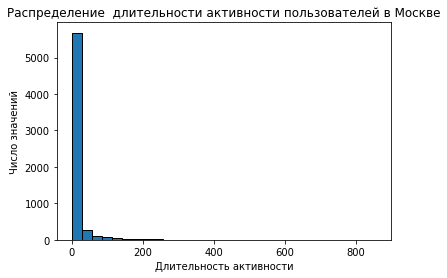

In [14]:
plt.hist(msc_df['hours'],bins=30,edgecolor='black')
plt.title('Распределение  длительности активности пользователей в Москве')
plt.xlabel('Длительность активности')
plt.ylabel('Число значений')
plt.show()

##### Распределение значений имеет одинаковый вид для обоих городов. Наиболее часто встречающиеся значения находятся в диапазоне от 0 до 20 часов

In [15]:
# Проверим группы на пересечение между собой
list_group_msc=msc_df['puid'].tolist()
list_group_spb=spb_df['puid'].tolist()
common_users=list(set(list_group_msc) & set(list_group_spb))
print(f"Общее число пользователей в Москве и Санкт-Петербурге: {len(common_users)}")  

Общее число пользователей в Москве и Санкт-Петербурге: 0


##### Пересечения групп по пользователям нет

## 2. Проверка гипотезы в Python

##### Сформулируем гипотезы: 

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [16]:
# Проведём статистический тест для сравнения групп пользователей, а уровень значимости alpha выберем равным 0.05
test_group_msc=msc_df['hours']
test_group_spb=spb_df['hours']

alpha=0.05

results=st.ttest_ind(test_group_spb,test_group_msc,alternative='greater')

if results.pvalue<alpha:
    print(f" Полученное значение pvalue:{results.pvalue} меньше уровня статистической значимости {alpha}. Не подтвердилась нулевая гипотеза о том, что средняя активность пользователей в двух городах не различается ")
else:
    print(f" Полученное значение pvalue:{results.pvalue} больше уровня статистической значимости {alpha}. Нулевая гипотеза получает подтверждение")

 Полученное значение pvalue:0.338193679651558 больше уровня статистической значимости 0.05. Нулевая гипотеза получает подтверждение


## 3. Аналитическая записка

- Для сравнения среднего двух групп был выбран t-test Стьюдента, так как значения в выборках независимы и одинаково распределены, а уровень значимости alpha был выбран равным 0.05

- Полученное значение pvalue:0.338193679651558 больше уровня статистической значимости 0.05

- На основе полученного p-value можно сделать вывод о том, что нулевая гипотеза нашла подтверждение и различия среднего значения активности в двух городах не имеют статистической значимости

# Часть 2. Анализ результатов A/B-тестирования

Обратились представители интернет-магазина BitMotion Kit, в котором продаются геймифицированные товары для тех, кто ведёт здоровый образ жизни. У него есть своя целевая аудитория, даже появились хиты продаж: эспандер со счётчиком и напоминанием, так и подстольный велотренажёр с Bluetooth.

В будущем компания хочет расширить ассортимент товаров. Но перед этим нужно решить одну проблему. Интерфейс онлайн-магазина слишком сложен для пользователей — об этом говорят отзывы.

Чтобы привлечь новых клиентов и увеличить число продаж, владельцы магазина разработали новую версию сайта и протестировали его на части пользователей. По задумке, это решение доказуемо повысит количество пользователей, которые совершат покупку.

Задача — провести оценку результатов A/B-теста. Получено:

* данные о действиях пользователей и распределении их на группы,

* техническое задание.

Оцените корректность проведения теста и проанализировать его результаты.

## 1 Цели исследования.



##### Оценить корректность проведённого А/В теста, провести статистический тест для подтверждения или опровержения гипотезы о том, что упрощение интерфейса приведёт к тому, что в течение семи дней после регистрации в системе конверсия зарегистрированных пользователей в покупателей увеличится как минимум на три процентных пункта

## 2. Загрузка и оценка данных.


In [17]:
# Загружаем данные
participants_df = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events_df = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [18]:
# Выводим первые пять строк таблицы participants
display(participants_df.head())

,user_id,group,ab_test,device
0,0002CE61FF2C4011,B,interface_eu_test,Mac
1,001064FEAAB631A1,B,recommender_system_test,Android
2,001064FEAAB631A1,A,interface_eu_test,Android
3,0010A1C096941592,A,recommender_system_test,Android
4,001E72F50D1C48FA,A,interface_eu_test,Mac


In [19]:
# Выводим первые пять строк таблицы events
display(events_df.head())

,user_id,event_dt,event_name,details
0,GLOBAL,2020-12-01 00:00:00,End of Black Friday Ads Campaign,ZONE_CODE15
1,CCBE9E7E99F94A08,2020-12-01 00:00:11,registration,0.0
2,GLOBAL,2020-12-01 00:00:25,product_page,NaN
3,CCBE9E7E99F94A08,2020-12-01 00:00:33,login,NaN
4,CCBE9E7E99F94A08,2020-12-01 00:00:52,product_page,NaN


In [20]:
# Выведем общую информацию о датафрейме participants_df
participants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB


##### Всего в датафрейме 14525 строк,пропусков нет.

In [21]:
# Выведем общую информацию о датафрейме events_df
events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787286 entries, 0 to 787285
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     787286 non-null  object        
 1   event_dt    787286 non-null  datetime64[ns]
 2   event_name  787286 non-null  object        
 3   details     249022 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 24.0+ MB


##### Всего в датафрейме 787286 строк,пропуски есть только в поле 'details'.

## 3. По таблице `ab_test_participants` оценить корректность проведения теста:

   3\.1 Выделим пользователей, участвующих в тесте, и проверим:

   - соответствие требованиям технического задания,

   - равномерность распределения пользователей по группам теста,

   - отсутствие пересечений с конкурирующим тестом (нет пользователей, участвующих одновременно в двух тестовых группах).

In [22]:
# Проверим наличие пересечения пользователей с конкурирующим тестом 'recommender_system_test'
interface_eu_test_users=participants_df[participants_df['ab_test']=='interface_eu_test']['user_id'].tolist()
recommender_system_test_users=participants_df[participants_df['ab_test']=='recommender_system_test']['user_id'].tolist()
common_test_group_users=list(set(interface_eu_test_users) & set(recommender_system_test_users))
print(f"Общее число пользователей в конкурирующих А/В тестах: {len(common_test_group_users)}") 

Общее число пользователей в конкурирующих А/В тестах: 887


##### Было обнаружено 887 общих пользователей для двух А/В тестов. Так как параллельные эксперименты на одной аудитории могут взаимодействовать и смещать оценки метрик, то для корректных результатов  исключим общих пользователей из анализируемого А/В теста.

In [23]:
# Удалим общих пользователей двух А/В тестов
participants_df = participants_df[~participants_df['user_id'].isin(common_test_group_users)]

In [24]:
# Проверим удаление
unique_test_users=participants_df['user_id'].tolist()
common_test_users=list(set(unique_test_users) & set(common_test_group_users))
print(f"Общее число пересекающихся со вторым А/В тестом пользователей : {len(common_test_users)}") 

Общее число пересекающихся со вторым А/В тестом пользователей : 0


In [25]:
# Отфильтруем датасет по пользователям теста 'interface_eu_test' согласно технического задания
test_df=participants_df[participants_df['ab_test']=='interface_eu_test']

In [26]:
# Проверим разделение на группы согласно технического задания
display(test_df['group'].unique())

array(['B', 'A'], dtype=object)

In [27]:
# Проверяем распределение пользователей по группам
groups_df=test_df.groupby('group')['user_id'].nunique().sort_values(ascending=False).reset_index()
display(groups_df)

,group,user_id
0,B,5011
1,A,4952


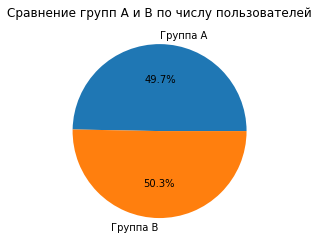

In [28]:
# Построим визуализацию для сравнения групп между собой
group_list=groups_df['user_id'].tolist()
group_a=group_list[1]
group_b=group_list[0]
groups_ab=[group_a,group_b]
plt.pie(groups_ab,
        labels=['Группа А','Группа В'],
        autopct='%1.1f%%')
plt.title('Сравнение групп А и В по числу пользователей')
plt.show()


##### Группы примерно равные по числу пользователей

In [29]:
# Проверяем пересечение пользователей двух групп
users_a=test_df[test_df['group']=='A']['user_id'].tolist()
users_b=test_df[test_df['group']=='B']['user_id'].tolist()
common_users=list(set(users_a) & set(users_b))
print(f"Общее число пользователей в группах А и В: {len(common_users)}") 

Общее число пользователей в группах А и В: 0


##### Общих пользователей в двух группах не обнаружено. Выборки независимы

3\.2 Проанализируйте данные о пользовательской активности по таблице `ab_test_events`:

- оставьте только события, связанные с участвующими в изучаемом тесте пользователями;

In [30]:
# Проверим наличие дубликатов в таблице events_df
display(events_df.duplicated().sum())

36318

##### Всего в таблице обнаружено 36318 дубликатов. Удалим их

In [31]:
# Удаляем дубликаты
events_df=events_df.drop_duplicates()

In [32]:
# Проверяем удаление
display(events_df.duplicated().sum())

0

In [33]:
# Отфильтруем дататасет по пользователям, участвующим в тесте
users_list=test_df['user_id'].tolist()
test_users_events_df=events_df[events_df['user_id'].isin (users_list)]

- определите горизонт анализа: рассчитайте время (лайфтайм) совершения события пользователем после регистрации и оставьте только те события, которые были выполнены в течение первых семи дней с момента регистрации;

In [34]:
# Выведем на экран все возможные события по датафрейму
display(test_users_events_df['event_name'].unique())

array(['registration', 'login', 'product_page', 'purchase',
       'product_cart'], dtype=object)

##### Всего 5 событий: регистрация, авторизация,страница продукта,продукт в корзине, покупка

In [35]:
# Сначала найдем даты регистрации для каждого пользователя
registration_dates = test_users_events_df[
    test_users_events_df['event_name'] == 'registration'
].set_index('user_id')['event_dt']


In [36]:
# Объединим данные с датами регистрации
test_users_events_df_copy = pd.merge(
    test_users_events_df,
    registration_dates.rename('registration_dt'),
    left_on='user_id',
    right_index=True
)

In [37]:
# Вычисляем lifetime
test_users_events_df_copy['lifetime'] = (
    test_users_events_df_copy['event_dt'] - 
    test_users_events_df_copy['registration_dt']
)

In [38]:
# Выведем на экран первые пять строк получившегося датафрейм
display(test_users_events_df_copy.head())

,user_id,event_dt,event_name,details,registration_dt,lifetime
64672,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0 days 00:00:00
72521,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,2020-12-06 14:10:01,0 days 11:15:13
72538,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,2020-12-06 14:10:01,0 days 11:15:46
145865,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,2020-12-06 14:10:01,2 days 22:30:48
145866,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,2020-12-06 14:10:01,2 days 22:30:48


In [39]:
# Оставим только те события, которые были выполнены в течение первых семи дней с момента регистрации
interval=pd.to_timedelta('7 days')
main_test_df=test_users_events_df_copy[test_users_events_df_copy['lifetime']<=interval]
display(main_test_df.head())

,user_id,event_dt,event_name,details,registration_dt,lifetime
64672,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0 days 00:00:00
72521,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,2020-12-06 14:10:01,0 days 11:15:13
72538,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,2020-12-06 14:10:01,0 days 11:15:46
145865,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,2020-12-06 14:10:01,2 days 22:30:48
145866,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,2020-12-06 14:10:01,2 days 22:30:48


Оцените достаточность выборки для получения статистически значимых результатов A/B-теста. Заданные параметры:

- базовый показатель конверсии — 30%,

- мощность теста — 80%,

- достоверность теста — 95%.

In [40]:
# Задаем параметры теста
base_conversion = 0.30  # Базовый показатель конверсии (30%)
effect_size = 0.03      # Минимальный обнаруживаемый эффект (3% от базового)
alpha = 0.05           # Уровень значимости (95% достоверность)
power = 0.80           # Мощность теста (80%)

# Рассчитываем размер эффекта (Cohen's d)
def cohen_d(p1, p2):
    return (p2 - p1) / np.sqrt(p1 * (1 - p1))

# Вычисляем размер эффекта
d = cohen_d(base_conversion, base_conversion + effect_size)

# Создаем объект для расчета мощности
analysis = TTestIndPower()

# Рассчитываем необходимый размер выборки
sample_size = analysis.solve_power(
    effect_size=d, 
    power=power, 
    alpha=alpha, 
    ratio=1  # Равное количество пользователей в группах
)

# Округляем до целого числа и умножаем на 2 (для двух групп)
total_sample_size = int(np.ceil(sample_size * 2))

print(f"Необходимый размер выборки для каждой группы: {int(np.ceil(sample_size))}")
print(f"Общий необходимый размер выборки: {total_sample_size}")

Необходимый размер выборки для каждой группы: 3664
Общий необходимый размер выборки: 7328


- рассчитаем для каждой группы количество посетителей, сделавших покупку, и общее количество посетителей.

In [41]:
# Соединяем таблицы с участниками и событиями
merged_test_df=main_test_df.merge(test_df, on='user_id',how='left')
display(merged_test_df.head())

,user_id,event_dt,event_name,details,registration_dt,lifetime,group,ab_test,device
0,5F506CEBEDC05D30,2020-12-06 14:10:01,registration,0.0,2020-12-06 14:10:01,0 days 00:00:00,A,interface_eu_test,iPhone
1,5F506CEBEDC05D30,2020-12-07 01:25:14,login,NaN,2020-12-06 14:10:01,0 days 11:15:13,A,interface_eu_test,iPhone
2,5F506CEBEDC05D30,2020-12-07 01:25:47,login,NaN,2020-12-06 14:10:01,0 days 11:15:46,A,interface_eu_test,iPhone
3,5F506CEBEDC05D30,2020-12-09 12:40:49,login,NaN,2020-12-06 14:10:01,2 days 22:30:48,A,interface_eu_test,iPhone
4,5F506CEBEDC05D30,2020-12-09 12:40:49,product_page,NaN,2020-12-06 14:10:01,2 days 22:30:48,A,interface_eu_test,iPhone


In [42]:
# Рассчитаем общее число посетителей для групп
total_users_df=merged_test_df.groupby('group')['user_id'].nunique().reset_index()
display(total_users_df)

,group,user_id
0,A,4952
1,B,5011


In [43]:
# Рассчитаем число посетителей, совершивших покупку
purchase_users_df=merged_test_df[merged_test_df['event_name']=='purchase']
purchase_users=purchase_users_df.groupby('group')['user_id'].nunique().reset_index()
display(purchase_users)

,group,user_id
0,A,1377
1,B,1480


In [44]:
# Рассчитаем долю посетителей, совершивших покупку
total_list=total_users_df['user_id'].tolist()
total_list_a=total_list[0]
total_list_b=total_list[1]

purchase_list=purchase_users['user_id'].tolist()
purchase_list_a=purchase_list[0]
purchase_list_b=purchase_list[1]

share_group_a=(purchase_list_a/total_list_a)*100
share_group_b=(purchase_list_b/total_list_b)*100
absolut_change=share_group_b-share_group_a
relative_change=((share_group_b-share_group_a)/share_group_a)*100

print(f"Общее число посетителей, совершивших покупку в группе А: {total_list_a}. Доля от всех посетителей: {share_group_a:.2f}% ")
print(f"Общее число посетителей, совершивших покупку в группе B: {total_list_b}. Доля от всех посетителей: {share_group_b:.2f}% ")
print(f"Абсолютное изменение в конверсии равно:{absolut_change:.2f}% ")
print(f"Относительное изменение конверсии равно:{relative_change:.2f}% ")

Общее число посетителей, совершивших покупку в группе А: 4952. Доля от всех посетителей: 27.81% 
Общее число посетителей, совершивших покупку в группе B: 5011. Доля от всех посетителей: 29.54% 
Абсолютное изменение в конверсии равно:1.73% 
Относительное изменение конверсии равно:6.21% 


- сделайте предварительный общий вывод об изменении пользовательской активности в тестовой группе по сравнению с контрольной.

##### В тестовой группе В конверсия из посетителей в покупатели увеличилась на 1.73% в абсолютных значениях и на 6.21% в относительных значениях по отношению к контрольной группе А

## 4. Проведём оценку результатов A/B-тестирования:

- Проверим изменение конверсии подходящим статистическим тестом, учитывая все этапы проверки гипотез.

##### Сформулируем гипотезы: 

- Нулевая гипотеза H₀: конверсия зарегистрированных пользователей в покупатели между контрольной А и тестовой В группами не различается.

- Альтернативная гипотеза H₁: конверсия зарегистрированных пользователей в покупатели выше в тестовой группе В .

##### Для сравнения конверсий в двух группах используем Z-test пропорций.

In [45]:
# Подготовим данные о  размерах групп и числе посетителей, совершивших покупку
n_a,n_b=total_list_a,total_list_b
m_a,m_b=purchase_list_a,purchase_list_b

In [46]:
# Проводим Z-test пропорций, уровень значимости alpha установим равным 0.05
from statsmodels.stats.proportion import proportions_ztest

alpha=0.05

stat_ztest,p_value_ztest=proportions_ztest([m_b, m_a],
    [n_b, n_a],
    alternative='larger')
print(f"Полученное значение p-value:{p_value_ztest}")
if p_value_ztest > alpha:
    print(f'pvalue={p_value_ztest} > {alpha}')
    print('Нулевая гипотеза находит подтверждение! ')
else:
    print(f'pvalue={p_value_ztest} < {alpha}')
    print('Нулевая гипотеза не находит подтверждения!')

Полученное значение p-value:0.028262547212292124
pvalue=0.028262547212292124 < 0.05
Нулевая гипотеза не находит подтверждения!


#####  Выводы
1. По результатам проведенного А/В теста было выявлено, что конверсия в тестовой группе В увеличилась на 1.73% в абсолютных значениях и на 6.21% в относительных значениях по отношению к контрольной группе А, что выше прогнозируемого положительного эффекта по альтернативной гипотезе на 3.21%. 

2. Для проведения статистического теста для проверки статистической значимости изменений были использованы следующие параметры:базовый показатель конверсии — 30%,мощность теста — 80%,достоверность теста — 95%,уровень значимости- 0.05. Размеры выборок в группах А и В равны 4952 и 5011 соответственно.

3. По результатам статистического теста было получено p_value равное 0.020306993983065475, что меньше уровня статистической значимости, установленного равным 0.05. Поэтому конверсия зарегистрированных пользователей в покупатели выше в тестовой группе В и различие статистически значимо. Можно сделать вывод о том, что упрощение интерфейса привело к увеличению конверсии зарегистрированных пользователей в покупателей в течение семи дней после регистрации в системе и изменение статистически значимо.

4. По полученным результатам можно рекомендовать внедрить новый интерфейс системы для пользователей, так как положительный эффект на конверсию из зарегистрированных пользователей в покупатели оказался выше прогнозируемого и это изменение имеет статистическую значимости, и соответственно не является случайным.